# Feedback from previous weeks and other and hints

1. Be careful about your environment remembering variables. Make sure your code works in a new _clean_ environment. In Colab: `Runtime`->`restart Runtime`, in Anaconda's Jupyter: `Kernel`->`Restart`.
2. Keep the file names when saving to GitHub. It's always possible to go back to a previous version, you are not losing anything.
3. Run all the cells before saving to GitHub so the output is saved.
4. Graphs without labels (or units when appropriate) are not worth any point.
5. Do put in sufficient explanatory comments in your code.

For this week you can use these imports at the start of your programs:

In [2]:
import numpy as np
from numpy.random import random, normal, seed
import matplotlib.pyplot as plt

**DO NOT** ```import *```. As your programs get more complex you will generally need to import a greater range of modules, and it's important to keep them separate.

# Introduction
Most physicists are unlikely to go gambling at Monte Carlo - even if they were paid enough. Our knowledge of statistics is sufficient warning. But that doesn’t stop physicists using the _Monte Carlo method_ extensively for maths and physics problems.

As the name suggests, the Monte Carlo (MC) method is based on using randomness. At first sight, this seems counter intuitive - surely random numbers can only lead to more randomness? As a very simple illustration of how to use random numbers in a calculation, consider the following problem.

Suppose you have a circular pond of of unit radius, placed exactly in a square area of grass.

Imagine throwing $N$ stones randomly into the square area. What number $n$ would land in the pond? Clearly we know the theoretical answer in this case - it just depends on the ratio area of the pond and square, so $n = N\pi/4$. But suppose you didn’t already know a value for $\pi$. Then by finding the ratio $4n/N$ you will have an approximation to $\pi$ which depends only on using random numbers (and, as we’ll see shortly, Pythagoras’ theorem).

To implement this idea in python you can make use of the following code snippet:

In [3]:
N=int(1e7)
n=0
for i in range (N):
    x = 2*random()-1
    y = 2*random()-1
    r = np.sqrt(x*x+y*y)
    if r <= 1.0:
        n+=1 # adds 1 to n
print(4*n/N)

KeyboardInterrupt: 

The function random returns a random real number uniformly distributed in the range $[0,1)$, so $x$ and $y$ lie in the range $[-1,1)$ here. Investigate what value of $\pi$ you get, and how it depends on the number $N$ that you pick. (You could repeat for different values of $N$ and plot a graph of $\pi$ versus $N$.) Note that you don’t really need to take the square root in this case as we are dealing with a unit circle. (We could equally just take a circular quadrant instead of a whole circle if we use random number in the interval 0 to 1)

The example above can take some time to run. But the code below, which does the same operations, is much faster:

In [ ]:
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

For the most part the increased speed is due to using _vector instructions_ built-in the `numpy` library. Those cannot be used by a `for` loop.

## Measuring execution speed

To measure the speed of a piece of code, if you are uring IPython/Jupyter (as Colab does), the IPython [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) command `%%time` is very useful:

In [ ]:
%%time

x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)

Note that the similar-sounding `%%timeit` command will run the cell several time and calculate the average. In the absence of IPython, you can also use the `datetime` module:

In [ ]:
from datetime import datetime
startTime = datetime.now()
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
n=np.sum(r <= 1.0)
print(4*n/N)
print(datetime.now() - startTime)

## How random?
It is interesting to plot out some generated random numbers to get a feel for how random they look. You already saw in week 3 of the PX1224 module how to plot out histograms. So we can do something like this...

In [ ]:
# make the uniform random data ...
N = int(1e5)
x = np.zeros(N)
for i in range(N): # very slow to loop like this
    x[i] = random()
# the histogram of the data
plt.hist(x, bins='auto',density=True);

And a neater way to create an array of N random numbers is like this ...

In [ ]:
# make the uniform random data ...
N = int(1e5)
x = random(N)
plt.hist(x, bins='auto',density=True);

You’ll see that, to the eye, the data look very uniformly distributed. How are random numbers generated in the computer? In fact, they are not entirely random, but are generated by an algorithm that produces a sequence of numbers that is _pseudo-random_. A great deal of research goes into generating pseudo-random numbers that pass known tests for randomness (rather more sophisticated than just looking at histograms). Take a look at http://www.random.org/ if you want truly random numbers.
One advantage of pseudo-random number generation is that you can always generate the same sequence of numbers again for testing purposes! This is done by using a starting seed. To do this the syntax is:
```python
seed(1234)
```
where you can use any convenient integer starting seed.

## Other probability distributions

The [numpy and scipy documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions) website gives a good description of other random number distributions, not just the uniform one we’ve looked at so far. For example `y = normal(loc=0.0, scale=1.0, size=N)` will return an array of $N$ numbers with a Gaussian or normal probability distribution, with mean $\mu = 0$ and standard deviation $\sigma = 1$.

# Applications

## Integration in 1-D

One application of the MC method is to the evaluation of integrals. Suppose we select $N$ random numbers $x_0,x_1,x_2,...,x_{N-1}$ in the interval $[0,1)$, then
$$
\int_0^1 f(x)\,dx\approx\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
This is not the best method in 1-D, since the error in the approximation is of order $1/\sqrt{N}$, and many more points are required for a good estimate of the integral than, for example, the Romberg method. But it turns out to be increasingly beneficial in higher dimensions.

Let’s look at a trivial example. We want to integrate $f(x) = x^2$ between 0 and 1. The relevant code snippet is something like this:

In [ ]:
def f(x):
    return x**2

N = int(1e3)
s = 0 # s is the sum
for i in range (N):
    x = random() # get a random number in [0,1) ...
    s += f(x)
integral = s/N
print('Approximate result for {} points: {}'.format(N,integral))

It’s fairly clear why this works, since $s/N$ will be the average value of the function. Multiplying by the interval length, $1$ in this example, thus approximates the integral. If we want the integral between limits (a,b), we would have to multiply the average of the function over this interval by (b-a).
$$
\int_a^b f(x)\,dx\approx(b-a)\frac{1}{N}\sum_{i=0}^{N-1}f(x_i)
$$
Note: **You need to improve the code** by avoiding the loop (i.e. using the vectorised form of
defining random numbers).

## Integration in 2-D

**Simplest case**: It’s easy to extend this idea to 2-D (and higher dimensions). If we have
a 2-D rectangular region $a \leq x \leq b$, $c \leq y \leq d$ then
$$
\int_a^b\int_c^d f(x,y)\,dxdy\approx\frac{(b-a)(c-d)}{N}\sum_{i=0}^{N-1}f(x_i,y_i)
$$
If the region - call it $\Omega$ - is not rectangular, we simply find the average over the region, then multiply by the area $A_\Omega$ of the region.

**General case**: Sometimes it’s hard to know the area of the region (because it is not a
simple shape or is defined by equations) but we can easily extend this idea as follows:

Simply define a rectangular region R (of _known_ area $A_R$) which contains $\Omega$ (This is what we did in the introduction):

![regions](https://raw.githubusercontent.com/PX2134/images/master/week6/regions.png)

Select $N$ points randomly in $R$. If $n$ of these points turn out to be within $\Omega$, then the area of region $\Omega$ is approximately $(n/N)A_R$. Our integral is thus
$$
\int\int_\Omega f(x,y)\,dxdy\approx\left(\frac{n}{N}A_R\right)\frac{1}{n}\sum_{i\in\Omega}f(x_i,y_i)
$$
where the notation $i\in\Omega$ means points $i$ which are within the region $\Omega$. If we integrate the function $f(x, y) = 1$ then this would let us calculate the unknown area of the region $\Omega$. If $f(x, y)$ were the _density_ of the region, then the integral would give us its _mass_.

Another way of deriving the equation above is to cancel out the $n$ and note that $A_R/N$ is just the average area that each point occupies in the plane. The double integral is thus (approximately) the average area per point multiplied by the sum of $f$ values within $\Omega$.

## Integration in 3-D
You can guess the rest! Again note here that if we integrate the function $f(x, y, z) = 1$ then it would give us the volume of a region. If $f(x, y, z)$ were the _density_ of the region, then the integral would give us its _mass_. Can you see how _moment of inertia_ could be calculated?

# Exercises
This must be marked before you leave the lab. Mark weighting is in brackets. **Save your work to GitHub after having run all cells with `Runtime` -> `Restart and run all`. And do not change the notebook's filename.** Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

## Exercise 0

See LearningCentral for a video of integrating a function using the Monte Carlo method.

## Exercise 1

[4] Plot histograms using the uniform and normal distribution random number generators. Investigate how the histograms depend on the number of points
taken.

Text(0.5, 1.0, 'Uniform Random Distribution for N=100')

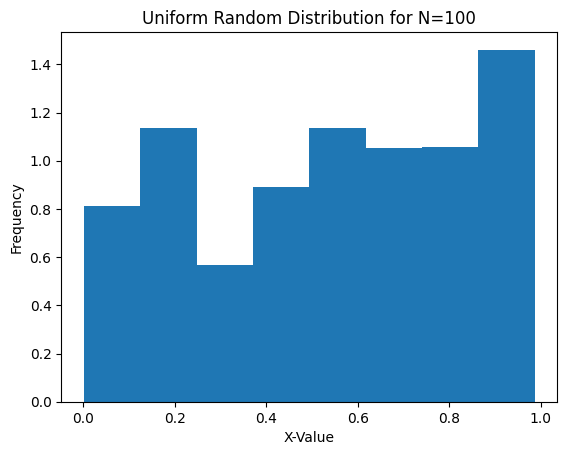

In [8]:
# For 100 points taken:

# Uniform Distribution
# Set N = 100, and define the X axis as the value of the random number (between the bounds of [0 and 1) ) produced.
N = int(1e2)
# Generate 100 of these random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x = random(N)
# Display as a histogram.
plt.hist(x, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Uniform Random Distribution for N=100')

Text(0.5, 1.0, 'Normal Distribution for N=100')

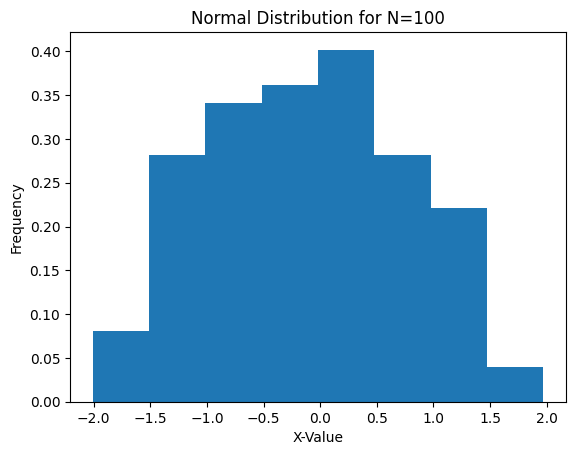

In [5]:
# For 100 points taken:

# Normal Distribution
# Set N = 100, and define the X axis as the value of the number produced.
N = int(1e2)
# Generate 100 of these normally distributed random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x2 = normal(loc=0.0, scale=1.0, size=N)
# Display as a histogram.
plt.hist(x2, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution for N=100')

Text(0.5, 1.0, 'Uniform Random Distribution for N=1000')

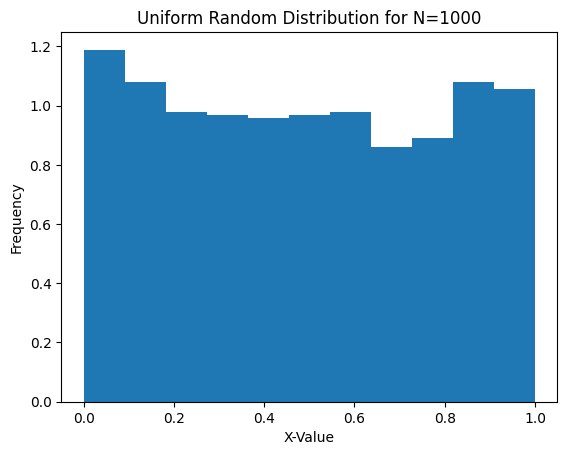

In [6]:
# For 1000 points taken:

# Uniform Distribution
# Set N = 1000, and define the X axis as the value of the random number (between the bounds of [0 and 1) ) produced.
N = int(1e3)
# Generate 1000 of these random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x = random(N)
# Display as a histogram.
plt.hist(x, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Uniform Random Distribution for N=1000')

Text(0.5, 1.0, 'Normal Distribution for N=1000')

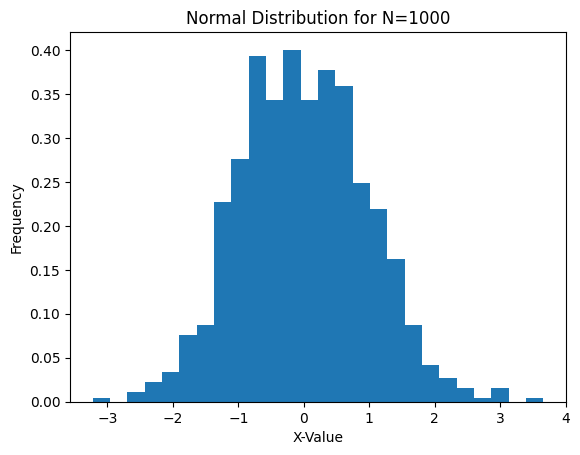

In [7]:
# For 1000 points taken:

# Normal Distribution
# Set N = 1000, and define the X axis as the value of the number produced.
N = int(1e3)
# Generate 1000 of these normally distributed random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x2 = normal(loc=0.0, scale=1.0, size=N)
# Display as a histogram.
plt.hist(x2, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution for N=1000')

Text(0.5, 1.0, 'Uniform Random Distribution for N=10000')

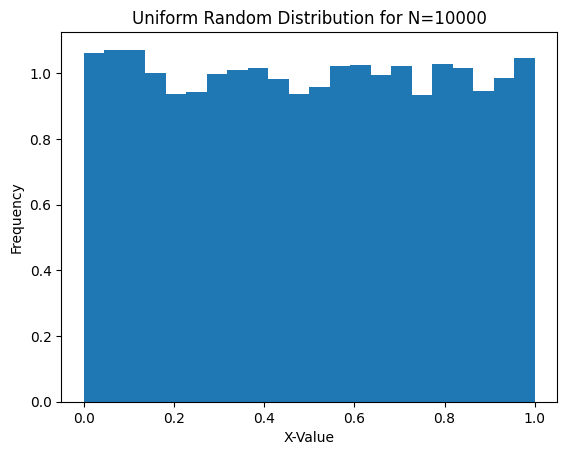

In [9]:
# For 10000 points taken:

# Uniform Distribution
# Set N = 10000, and define the X axis as the value of the random number (between the bounds of [0 and 1) ) produced.
N = int(1e4)
# Generate 10000 of these random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x = random(N)
# Display as a histogram.
plt.hist(x, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Uniform Random Distribution for N=10000')

Text(0.5, 1.0, 'Normal Distribution for N=10000')

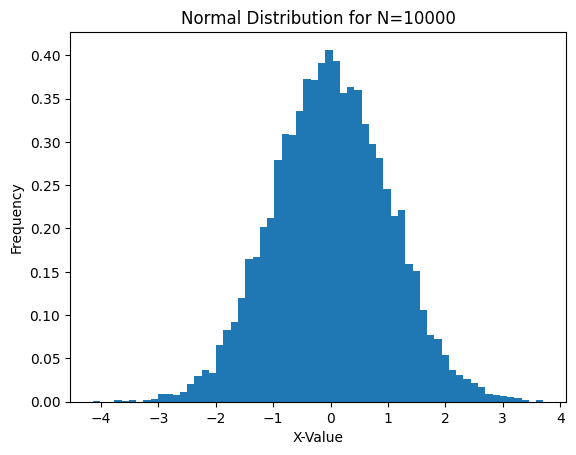

In [10]:
# For 10000 points taken:

# Normal Distribution
# Set N = 10000, and define the X axis as the value of the number produced.
N = int(1e4)
# Generate 10000 of these normally distributed random values, and hence display them on a histogram where the y axis displays the frequency at which they are generated.
x2 = normal(loc=0.0, scale=1.0, size=N)
# Display as a histogram.
plt.hist(x2, bins='auto',density=True);
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution for N=10000')

In [11]:
# Analysis:

# As the number of points taken increases by a factor of ten, it's clear that the histogram itself becomes more precise, with more data to work with and hence it becomes more capable
# of displaying values between smaller ranges as there is more data to process and hence group into smaller seperations.

# As expected with an increasing number of points, the random variation in the data is also significantly higher the fewer number of datapoints there are. For 100 datapoints the uniform random distribution
# will hardly look uniform at all for most generated datasets, as there is a high degree of randomness in only 100 datapoints, even if they are attempted to be distributed evenly.
# However, as the number of datapoints increases, under the law of truly large numbers the randomness reverts to the mean, and hence by 10000 datapoints the uniform random distribution,
# although still showing some variation in it's frequencies, has all x-values appear approximately as often as all other x-values.

# The normal distribution also becomes more consistent with higher N values, with the bell curve becoming more well defined the greater amount of values there are.
# Additionally, there is a greater range of possible X values displayed in the histogram of the normal distrubution when there are more points, which is naturally expected
# as with a greater number of points there is a higher probability of points generating x values at the low and high extremes of the normal distribution, and enough
# of them being present to appear on the histogram, while when N is a smaller value there is less opportunity for further spaced points to generate, and those that do will
# not generate often enough to appear on the low resolution histogram.

## Exercise 2

[7] Find $\pi$ using the method described in the introduction and plot a unit square to illustrate points which lie within the unit circle. It’s much faster to use the second method of making the random numbers, `x=random(N)`. You should plot data points within the circle in blue and those outside in green. Adapt code similar to that below to do the plotting.
```python
inpond = np.sqrt(x**2+y**2) <= 1.0 # True if in the pond
plt.plot(x[inpond==True], y[inpond==True],'b.')
```
 Compare the speed between using a `for` loop and using the vectorised `x=random(N)`.

In [12]:
from math import sqrt, pow

Hence, pi is approximately equal to 3.1504
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


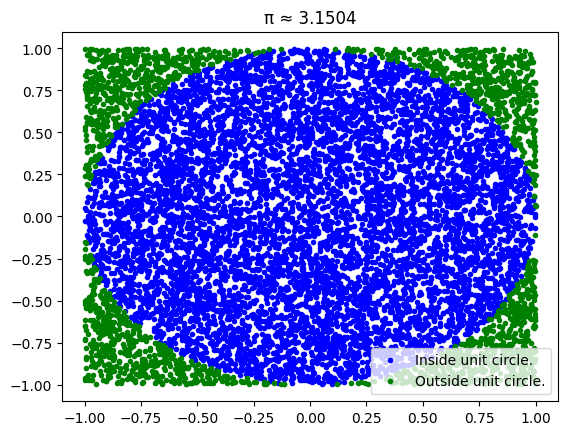

In [13]:
# Method utilising the 'for' loop.
# Define arrays for x, y and the values within the unit circle.
x_vals = []
y_vals = []
inpond = []
# Create the loop
N=int(1e4)
n=0
for i in range (N):
    # Over 10 thousand instances, generate random values for x and y where x or y is equal to 2*k-1, where k is a random float between [0,1). This will contribute to the position of the 'stones'.
    x = 2*random()-1
    y = 2*random()-1
    # Hence use these values to determine the radius at which the 'stones' land in.
    r = sqrt(x*x+y*y)
    x_vals.append(x)
    y_vals.append(y)
    inpond.append(r <= 1.0)
    if r <= 1.0:
        n+=1 # adds 1 to n
        # If the 'stones' are within 1 unit radius, they land within the unit circle. Hence it is appropriate to incrament the value of n by one.
        # If it were to land further than r=1, then n would not be incramented. Hence, by the end of the loop, it provides a suitable ratio of n vs. N. How many 'stones' land within the circle for N throws.
# Finally, use the generated value of n to determine a value for pi.
# With the knowledge that the ratio n=Nπ/4 exists for a circle within a square area, find pi via π=(n*4)/N
print('Hence, pi is approximately equal to', 4*n/N,)
# Fill the arrays with appropriate values of x, y, and said x and y values which lie within the unit circle.
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
inpond = np.array(inpond)

# Plot the values, blue being within the unit circle, and green being outside.
plt.plot(x_vals[inpond], y_vals[inpond],'b.', label='Inside unit circle.')
plt.plot(x_vals[~inpond], y_vals[~inpond],'g.', label='Outside unit circle.')
plt.legend()
plt.title(f'π ≈ {4*n/N}')

%time

Hence, pi is approximately equal to 3.1428
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


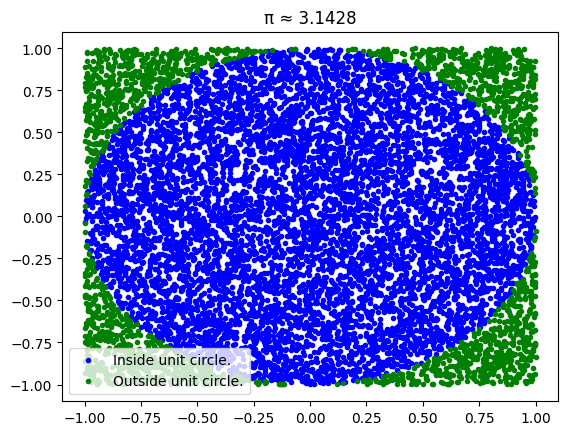

In [14]:
# For condensed method:
# Define arrays for x, y and the values within the unit circle.
x_vals = []
y_vals = []
inpond = []
N=int(1e4)

# Generate values for x and y to hence create an approximate for π, and to generate data for the arrays x_vals, y_vals, and inpond, to be plotted.
x,y=2*np.random.rand(2,N)-1
r=np.sqrt(x*x+y*y)
x_vals.append(x)
y_vals.append(y)
inpond.append(r <= 1.0)
n=np.sum(r <= 1.0)
print('Hence, pi is approximately equal to', 4*n/N,)

# Fill the arrays witht he appropriate data and hence plot.
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
inpond = np.array(inpond)
# Plot the values, blue being within the unit circle, and green being outside.
plt.plot(x_vals[inpond], y_vals[inpond],'b.', label='Inside unit circle.')
plt.plot(x_vals[~inpond], y_vals[~inpond],'g.', label='Outside unit circle.')
plt.legend()
plt.title(f'π ≈ {4*n/N}')

%time

In [15]:
# In this instance, the loop function is actually slightly faster than the condensed function, though both are very quick and the time difference between them is relatively insignificant.
# However, this is only due to the modest number of values. If N were to be orders of magnitude larger, e.g. N=1e7, the loop function is drastically slower.

## Exercise 3

[9] Integrate $f(x) = sin(x)tan(x)$ between $0$ and $\pi/4$ using the MC method, and compare with the exact answer (obtained for instance via [WolframAlpha](https://www.wolframalpha.com/)). Investigate what happens with increasing the number of points $N$ you use by plotting the MC answer versus number of points, choosing appropriate values for $N$ and choice of axes.

 To get full marks you must avoid using a loop in the integration (but you can loop over different values of $N$).

In [16]:
from numpy import sin, tan, pi

In [17]:
# Define the function f(x) as sin(x)*tan(x)
def f(x):
    return sin(x)*tan(x)
N=int(1e2)
# Define N random values of x between [0 and 1).
x=np.random.rand(1, N)
# Define s as the sum of all values of f(x)
s=np.sum(f(x))

# Hence, the integral will be equal to the average value of the function f(x) (s/N) multiplied by b-a ((pi/4)-0) to account for the integral's bounds.
integral100 = (pi/4)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral100))

Approximate result for 100 points: 0.30613969427649135


In [18]:
def f(x):
    return sin(x)*tan(x)
N=int(5e2)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral500 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral500))

Approximate result for 500 points: 0.3158670001254806


In [19]:
def f(x):
    return sin(x)*tan(x)
N=int(1e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral1000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral1000))

Approximate result for 1000 points: 0.29580410823228426


In [20]:
def f(x):
    return sin(x)*tan(x)
N=int(1.5e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral1500 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral1500))

Approximate result for 1500 points: 0.29797143238323587


In [21]:
def f(x):
    return sin(x)*tan(x)
N=int(2e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral2000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral2000))

Approximate result for 2000 points: 0.30783640992964645


In [23]:
def f(x):
    return sin(x)*tan(x)
N=int(3e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral3000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral3000))

Approximate result for 3000 points: 0.30044556214471757


In [24]:
def f(x):
    return sin(x)*tan(x)
N=int(4e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral4000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral4000))

Approximate result for 4000 points: 0.2994271190392007


In [25]:
def f(x):
    return sin(x)*tan(x)
N=int(5e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral5000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral5000))

Approximate result for 5000 points: 0.3031176585499125


In [34]:
def f(x):
    return sin(x)*tan(x)
N=int(6e3)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral6000 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral6000))

Approximate result for 6000 points: 0.3032165215456602


Text(0, 0.5, 'Integral value.')

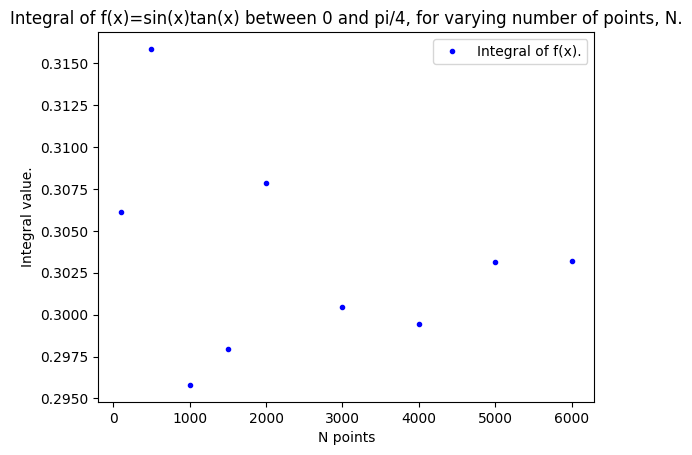

In [35]:
plt.plot([100,500,1000,1500,2000,3000,4000,5000,6000], [integral100, integral500, integral1000, integral1500, integral2000, integral3000, integral4000, integral5000, integral6000], 'b.', label='Integral of f(x).')
plt.legend()
plt.title('Integral of f(x)=sin(x)tan(x) between 0 and pi/4, for varying number of points, N.')
plt.xlabel('N points')
plt.ylabel('Integral value.')

In [31]:
# The real value of the integral is approximately 0.17, between the assigned limits, while with the function created in python
# with an increasing number of points, N, the value approximately converges towards 0.302.

def f(x):
    return sin(x)*tan(x)
N=int(1e8)
x=np.random.rand(1,N)
s=np.sum(f(x))

integral1e8 = ((pi/4)-0)*(s/N)
print('Approximate result for {} points: {}'.format(N,integral1e8))

# It's clear that there is a singificant error in either the approximation or the code itself, as the real value is almost half that of the python approximate value.

Approximate result for 100000000 points: 0.3021786367106741
